In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mne

# MNE integration

In [Databases handler](01-databases.html) it is explained how to get *raw* data from the databases, this section introduces how to get [MNE](https://mne.tools/stable/index.html) data formats.

In [2]:
from gcpds.utils import loaddb

db = loaddb.BCI2a('BCI2a_database')
db.load_subject(1)

`db.mne_epochs()` return an object [mne.Epochs](https://mne.tools/stable/generated/mne.Epochs.html?highlight=epoch) this make database compatible with all **MNE** tools.

In [3]:
epochs = db.mne_epochs()

288 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


## Evokeds

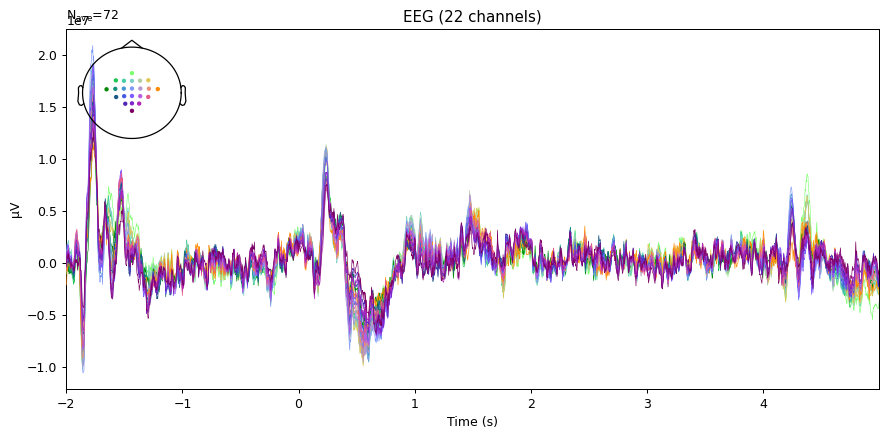

In [4]:
evoked = epochs['left hand'].average()

fig = plt.figure(figsize=(10, 5), dpi=90)
ax = plt.subplot(111)
evoked.plot(axes=ax, spatial_colors=True);

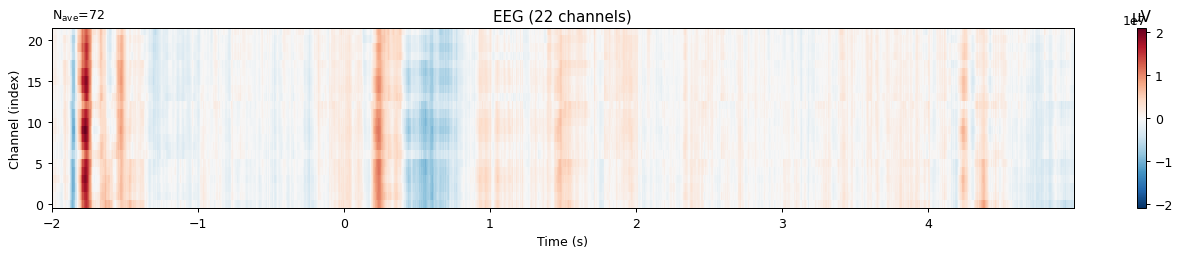

In [5]:
fig = plt.figure(figsize=(15, 3), dpi=90)
ax = plt.subplot(111)
evoked.plot_image(axes=ax);

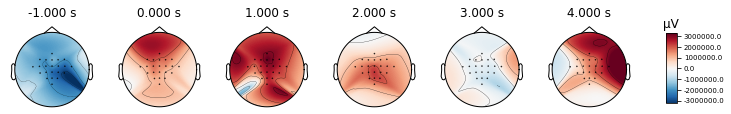

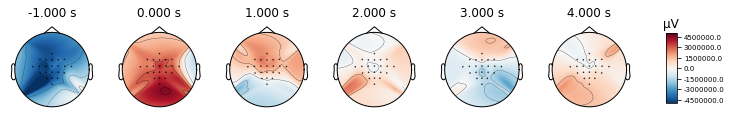

In [6]:
times = np.linspace(-1, 4, 6)

epochs['left hand'].average().plot_topomap(times,)
epochs['right hand'].average().plot_topomap(times,);

Setting up band-pass filter from 3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 sec)



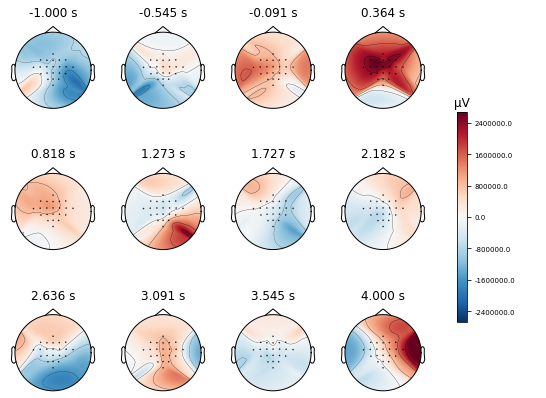

In [7]:
evoked = epochs['left hand'].average()
evoked = evoked.filter(3, 30)

times = np.linspace(-1, 4, 12)
evoked.plot_topomap(times, ncols=4, nrows=3);

In [ ]:
evoked = epochs['right hand'].average()
evoked = evoked.filter(8, 12)

times = np.linspace(-1, 4, 5*30)
fig, anim  = evoked.animate_topomap(times=times, ch_type='eeg', time_unit='s', blit=False, butterfly=True)
anim.save('images/anim.gif', writer='imagemagick', fps=10);

![](images/anim.gif)